<a href="https://colab.research.google.com/github/m-bkarimi/Grokking-Deep-Learning/blob/master/chapter5_gdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=red> Gradient descent learning with multiple inputs </font>

In [ ]:
import matplotlib.pyplot as plt
weights = [0.1, 0.2, -.1]
toes = [8.5 , 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2 , 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
input = [toes[0],wlrec[0],nfans[0]]
def w_sum(a,b):
  assert(len(a) == len(b))
  output = 0
  for i in range(len(a)):
    output += (a[i] * b[i])
  return output


def neural_network(input, weights):
  pred = w_sum(input,weights)
  return pred



def ele_mul(number,vector):
  output = [0,0,0]
  assert(len(output) == len(vector))
  for i in range(len(vector)):
    output[i] = number * vector[i]
  return output
pred = neural_network(input,weights)
error = (pred - true) ** 2
delta = pred - true
weight_deltas = ele_mul(delta,input)
alpha = 0.01
for i in range(len(weights)):
  weights[i] -= alpha * weight_deltas[i]
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))


<font color=red>**How do you turn a single delta (on the node) into three weight_delta values?**</font>

**delta**

A measure of how much higher or lower you want a node’s value to be, to predict perfectly
given the current training example.
weight_delta, on the other hand, is an estimate of the direction and amount to move the
weights to reduce node_delta, inferred by the derivative. How do you transform delta into
a weight_delta? You multiply delta by a weight’s input.

**weight_delta**

A derivative-based estimate of the direction and amount you should move a weight to reduce
node_delta, accounting for scaling, negative reversal, and stopping

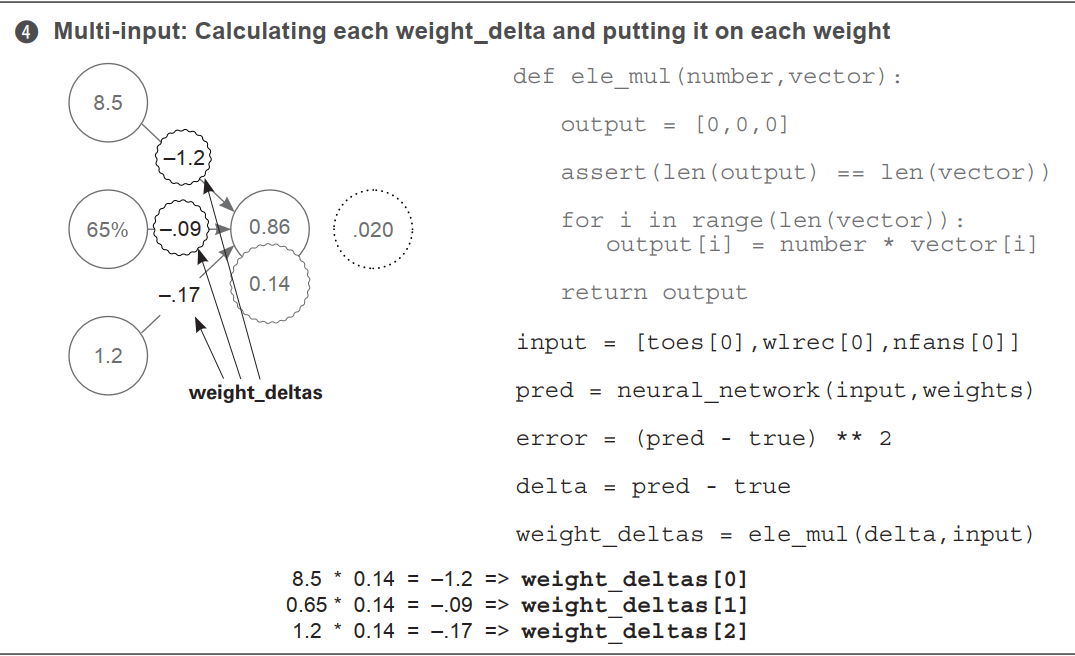

**<font color=red>Let’s watch several steps of learning
</font>**
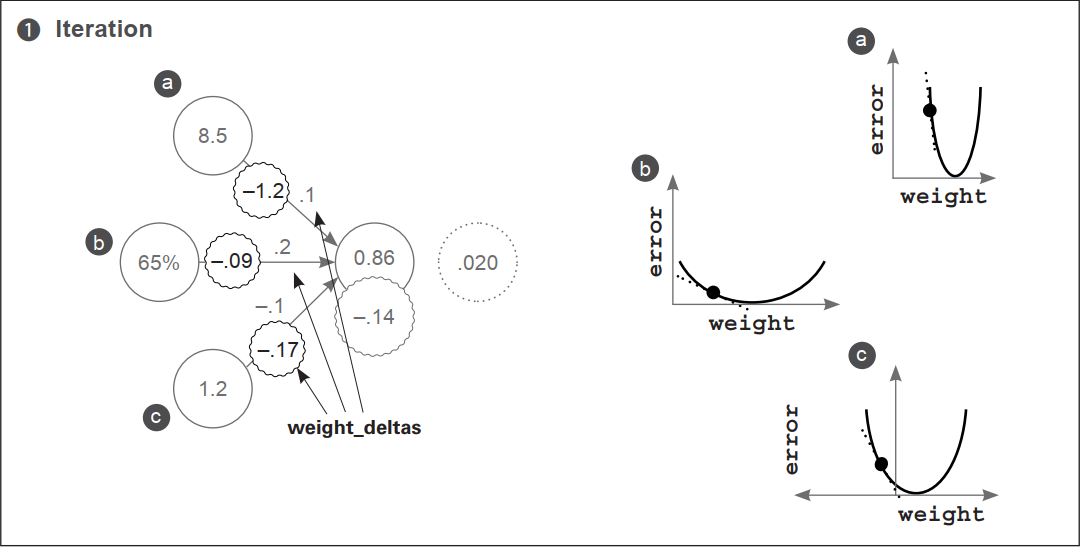


<font color=red>**Freezing one weight: What does it do?**</font>

This experiment is a bit advanced in terms of theory, but I think it’s a great exercise to
understand how the weights affect each other. You’re going to train again, except weight a
won’t ever be adjusted. You’ll try to learn the training example using only weights b and c

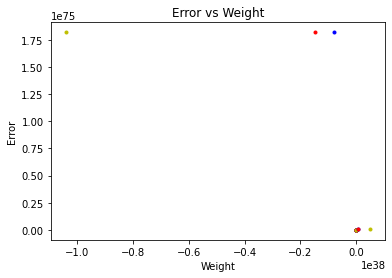

In [ ]:
import matplotlib.pyplot as plt

def neural_network(input, weights):
  out = 0
  for i in range(len(input)):
    out += (input[i] * weights[i])
  return out
def ele_mul(scalar, vector):
  out = [0,0,0]
  for i in range(len(out)):
    out[i] = vector[i] * scalar
  return out
toes = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
win_or_lose_binary = [1, 1, 0, 1]
true = win_or_lose_binary[0]
alpha = 0.3
weights = [0.1, 0.2, -.1]
input = [toes[0],wlrec[0],nfans[0]]
for iter in range(30):
  pred = neural_network(input,weights)
  error = (pred - true) ** 2
  delta = pred - true
  weight_deltas=ele_mul(delta,input)
  #weight_deltas[0] = 0
  # print("Iteration:" + str(iter+1))
  # print("Pred:" + str(pred))
  # print("Error:" + str(error))
  # print("Delta:" + str(delta))
  # print("Weights:" + str(weights))
  # print("Weight_Deltas:")
  # print(str(weight_deltas))
  for i in range(len(weights)):
    weights[i]-=alpha*weight_deltas[i]
  plt.plot(weights[1], error, 'b.-')
  plt.plot(weights[2], error, 'r.-')
  plt.plot(weights[0], error, 'y.-')

  # set the plot title and axis labels
  plt.title('Error vs Weight')
  plt.xlabel('Weight')
  plt.ylabel('Error')
plt.show()

<font color=red>**Gradient descent learning with multiple outputs**</font>

**Neural networks can also make multiple predictions using only a single input.**
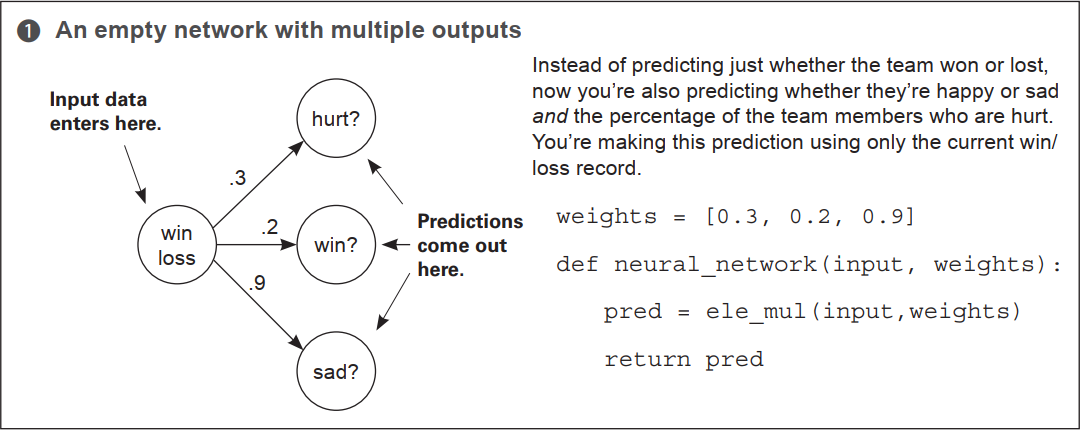

In [ ]:
weights = [0.3, 0.2, 0.9]
wlrec = [0.65, 1.0, 1.0, 0.9]
hurt = [0.1, 0.0, 0.0, 0.1]
win = [ 1, 1, 0, 1]
sad = [0.1, 0.0, 0.1, 0.2]
input = wlrec[0]
true = [hurt[0], win[0], sad[0]]
error = [0, 0, 0]
delta = [0, 0, 0]
alpha = 0.1


def neural_network(input, weights):
  pred = ele_mul(input,weights)
  return pred


def scalar_ele_mul(number,vector):
  output = [0,0,0]
  assert(len(output) == len(vector))
  for i in range(len(vector)):
    output[i] = number * vector[i]
  return output

pred = neural_network(input,weights)
for i in range(len(true)):
  error[i] = (pred[i] - true[i]) ** 2
  delta[i] = pred[i] - true[i]
weight_deltas = scalar_ele_mul(input,weights)

for i in range(len(weights)):
  weights[i] -= (weight_deltas[i] * alpha)
print(error)
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))


[0.009025, 0.7569, 0.2352250000000001]
Weights:[0.28049999999999997, 0.187, 0.8415]
Weight Deltas:[0.195, 0.13, 0.5850000000000001]


<font color=red>**Gradient descent with multiple inputs and outputs**<font>


In [ ]:
            #toes %win #fans
weights = [ [0.1, 0.1, -0.3,-0.3],#hurt?
            [0.1, 0.2, 0.0,0.0], #win?
            [0.0, 1.3, 0.1,.02] ]#sad?

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])

    return output

def vect_mat_mul(vect,matrix):
    # assert(len(vect) == len(matrix))
    output = [0,0,0]
    print(matrix[0])
    print(vect)

    for i in range(len(output)):
        output[i] = w_sum(vect,matrix[i])
    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred
import numpy as np
def outer_prod(a, b):
    
    # just a matrix of zeros
    out = np.zeros((len(a), len(b)))

    for i in range(len(a)):
        for j in range(len(b)):
          out[i][j] = a[i] * b[j]
    return out

toes  = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt  = [0.1, 0.0, 0.0, 0.1]
win   = [  1,   1,   0,   1]
sad   = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01

input = [toes[0],wlrec[0],nfans[0],nfans[0]]
true  = [hurt[0], win[0], sad[0]]

pred = neural_network(input,weights)

error = [0, 0, 0] 
delta = [0, 0, 0]

for i in range(len(true)):
    error[i] = (pred[i] - true[i]) ** 2
    delta[i] = pred[i] - true[i]


weight_deltas = outer_prod(delta,input)

for i in range(len(weights)):
    for j in range(len(weights[0])):
        weights[i][j] -= alpha * weight_deltas[i][j]


[0.1, 0.1, -0.3, -0.3]
[8.5, 0.65, 1.2, 1.2]
[0.19500000000000006, 0.9800000000000001, 0.9890000000000001]


Streaming output truncated to the last 5000 lines.
 2.9439918  2.82781709 0.8623493  1.79974693]
254
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 254
[ 0.67153474  1.6557066   0.52039196  1.7266246  -0.16790146  3.34059328
  2.12230339  0.90825249  1.42915044  2.58395298]
255
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 255
[ 1.37694656  0.46493767  0.74109651  0.97887199  1.33988742  0.5465974
 -1.65774463 -0.1807431   1.56759357  1.052652  ]
256
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] 256
[ 0.35244224  0.66989564  0.08867255  2.07968603 -1.07056879  0.23890892
  1.81198873 -0.31743596  1.54217511 -0.65681878]
257
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 257
[-2.28532992 -3.64092634 -0.86483988 -3.38317966 -2.04572222 -2.39649407
 -2.02960984 -1.58206266 -4.37717878 -2.22684467]
258
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 258
[ 0.10291893  1.11952022 -0.72303293  0.33086283 -0.95202631 -1.22087976
 -1.12310703 -0.71193927 -0.76492143 -0.34678989]
259
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 259
[-1.82219359 -2.28103027  0.12469965 -2.97425645 

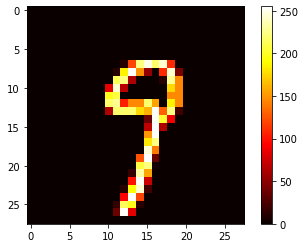

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

            #toes %win #fans
weights = [ [0.1, 0.1, -0.3],#hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ]#sad?
weights = np.zeros([10,784])#np.random.rand(784,10)#


def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0

    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vect_mat_mul(vect,matrix):
    # assert(len(vect) == len(matrix))
    output = [0,0,0]
    output = np.zeros(10)
    for i in range(len(output)):#len(vect)-1
        output[i] = w_sum(vect,matrix[i])

    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred
def outer_prod(a, b):
      
      # just a matrix of zeros
      out = np.zeros((len(a), len(b)))

      for i in range(len(a)):
          for j in range(len(b)):
              out[i][j] = a[i] * b[j]
      return out

toes  = [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

hurt  = [0.1, 0.0, 0.0, 0.1]
win   = [  1,   1,   0,   1]
sad   = [0.1, 0.0, 0.1, 0.2]

alpha = 0.01

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
# out = np.zeros((len(784), len(10)))
# print(train_X[0].flatten().shape)

input = [toes[0],wlrec[0],nfans[0]]
input = train_X[0].flatten()
true  = [hurt[0], win[0], sad[0]]
true = np.zeros(10)
# print(true)
true[train_y[0]]=1
for item in range(1):
  pred = neural_network(input,weights)
#  print(pred.shape)
  error = [0, 0, 0] 
  delta = [0, 0, 0]
  error = np.zeros(10) 
  delta = np.zeros(10)

  for i in range(len(true)):
      error[i] = (pred[i] - true[i]) ** 2
      delta[i] = pred[i] - true[i]
  # print(error)
  print(delta)
  import numpy as np


  weight_deltas = outer_prod(delta,input)
  # print(weight_deltas.shape)
  # print(weights.shape)
  # print(len(weights))

  for i in range(len(weights)):
      for j in range(len(weights[0])):
          weights[i][j] -= alpha * weight_deltas[i][j]
  import seaborn as sns

sns.heatmap(weights, linewidth=0.5)
plt.show()
# print(weights)


# from keras.datasets import mnis

# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# print(train_X[0].flatten().shape)
# print('Y_train: ' + str(train_y.shape))
# print('X_test:  '  + str(test_X.shape))
# print('Y_test:  '  + str(test_y.shape))



In [ ]:

from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
# out = np.zeros((len(784), len(10)))
print(train_y[0])
# print('Y_train: ' + str(train_y.shape))
# print('X_test:  '  + str(test_X.shape))
# print('Y_test:  '  + str(test_y.shape))


5
